In this notebook, we will normalize and split some ATLAS data into training dataset and validation dataset.

In [1]:
import sys
sys.version

'3.7.9 (default, Aug 31 2020, 12:42:55) \n[GCC 7.3.0]'

We will import all the required libraries and set the data path.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

path_data = "monojet_Zp2000.0_DM_50.0_chan3.csv"

We will read the dataset using two seperators "," & ";" and then read the columns in range 5 to 9 as these columns correspond to "obj1", "E1", "pt1", "eta1" & "phi1" .

Then we will take a look at the last 5 smaples using df.tail()

In [3]:
cols = [i for i in range(5,10)]
data = pd.read_csv(path_data,
                    header=None,
                    usecols=cols,
                    names=["obj1", "E1", "pt1", "eta1", "phi1"],
                    sep="[,;]",
                    engine='python',
                    )

print("Data Sample:")
data.tail()

Data Sample:


,obj1,E1,pt1,eta1,phi1
6394,j,1119940.0,1012690.0,0.453265,-1.772780
6395,j,1915090.0,874869.0,1.418550,1.839270
6396,j,787964.0,263158.0,1.759810,0.456786
6397,j,731849.0,722541.0,-0.134499,2.563930
6398,j,893689.0,742040.0,-0.618057,-3.104660


We will filter out the rows where obj1 = j  and drop/remove the obj1 column.

In [4]:
mask = data["obj1"] == 'j'
data_j = data.loc[mask]
data_j = data_j.drop(columns='obj1')
data_j.head()

,E1,pt1,eta1,phi1
1,1069460.0,751597.0,0.858186,-1.842170
2,676000.0,640429.0,0.330450,0.704554
3,936707.0,616229.0,0.973383,-1.565920
4,640313.0,589524.0,0.390749,1.237340
5,583373.0,545730.0,0.364057,-1.607320


We will run df.describe() to get statistics about are data set such as mean ,standard deviation(std), etc.

In [5]:
data.describe()

,E1,pt1,eta1,phi1
count,6.399000e+03,6.399000e+03,6399.000000,6399.000000
mean,8.311446e+05,5.885313e+05,0.006106,-0.002143
std,4.284093e+05,2.495100e+05,0.881935,1.798542
min,1.398320e+05,1.358400e+05,-3.073250,-3.141360
25%,5.354220e+05,4.107040e+05,-0.611922,-1.552550
50%,7.351440e+05,5.486730e+05,-0.006155,0.037045
75%,1.012185e+06,7.104085e+05,0.630124,1.514105
max,4.413680e+06,2.090860e+06,2.644470,3.139160


We will define a function to plot histograms of all the columns in the dataset.

In [6]:
def plot_all(data):
    fig, axis = plt.subplots(2, 2, figsize=(15,13))
    axis = axis.ravel()
    keys = data.keys()
    for idx, ax in enumerate(axis):
        ax.hist(data[keys[idx]], bins=100)
        ax.set_xlabel(str(keys[idx]))
        ax.set_ylabel('Number of events')
        ax.set_yscale('log')
    plt.subplots_adjust(wspace=0.3)


Now using plot_all function lets lot all the data.

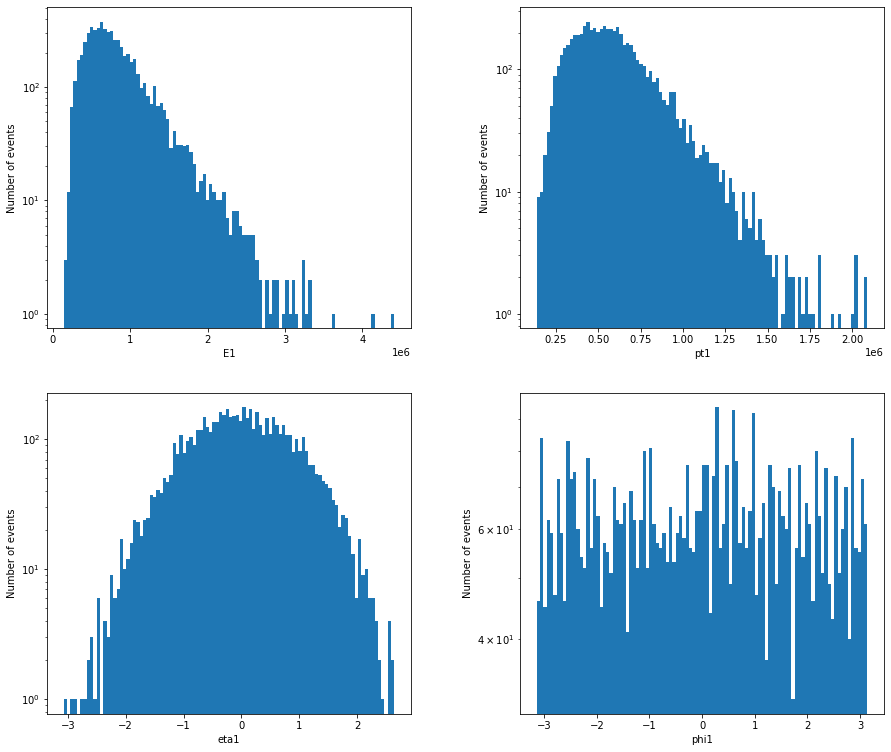

In [7]:
plot_all(data_j)

We define a function to split and save our data to pickle format at the given path.

In [8]:
def split_to_pickle(data, path):
    train, test = train_test_split(data, test_size=0.3, shuffle=True, random_state=1)
    print("Train len, Test len -",len(train),len(test))
    print("Training Sample : ")
    print(train.head())
    print("Testing Sample:")
    print(test.head())
    train.to_pickle(path + '/train.pkl')
    test.to_pickle(path + '/test.pkl')

As we can see E1 and pt1 have very high mean and std due to large values, therefore before saving we can make the values smaller by dividing the respective column values by 1000.

Lets define norm and unnorm functions to do that for us.

In [9]:
def no_norm(data):
    data_copy = data.copy()
    data_copy['E1'] = data_copy['E1'] / 1000
    data_copy['pt1'] = data_copy['pt1'] / 1000
    return data_copy

def no_unnorm(data):
    data_copy = data.copy()
    data_copy['E1'] = data_copy['E1'] * 1000
    data_copy['pt1'] = data_copy['pt1'] * 1000
    return data_copy

Lets split and save the data using the function we created.

In [10]:
split_to_pickle(no_norm(data_j), path="./NoNormilization")

Train len, Test len - 4341 1861
Training Sample : 
            E1      pt1      eta1      phi1
5337  1649.570  731.106 -1.451790  0.871826
1994   839.980  320.561  1.615880 -1.014760
1345   707.283  502.143  0.871445  0.375241
5063  1186.560  842.520  0.872740 -1.741290
5542  1191.120  849.486 -0.866221  2.911510
Testing Sample:
            E1       pt1      eta1     phi1
1079   560.120   222.478 -1.570350 -3.02819
3930  1215.420  1006.740 -0.620255 -1.30024
5437   982.985   547.722  1.188010  1.03066
3492   566.231   489.988 -0.393831 -1.62078
3702   572.985   470.730  0.637856 -2.56008


Now the we have saved un-normalized data, lets apply some normalization.

We will first apply std normilization to make the variance of each input feature 1.

For this we need to know the mean and std of the data.

In [11]:
print(data_j.mean())
print(data_j.std())

E1      832868.093196
pt1     589437.055788
eta1         0.003228
phi1         0.004107
dtype: float64
E1      430473.147784
pt1     249542.292299
eta1         0.882507
phi1         1.797267
dtype: float64


Now we will create functions to normalize and unnormalize data using std normalization.

In [12]:
def standard_normalize_4D(data):
    data_copy = data.copy()
    data_copy['E1'] = (data_copy['E1']  - 832868.093196) / 430473.147784
    data_copy['pt1'] = (data_copy['pt1']  - 589437.055788) / 249542.292299
    data_copy['eta1'] = (data_copy['eta1']  - 0.003228) / 0.882507
    data_copy['phi1'] = (data_copy['phi1']  - 0.004107) / 1.797267
    return data_copy

def standard_unnormalize_4D(data):
    data_copy = data.copy()
    data_copy['E1'] = (data_copy['E1'] * 430473.147784 ) + 832868.093196
    data_copy['pt1'] = (data_copy['pt1'] * 249542.292299 ) + 589437.055788
    data_copy['eta1'] = (data_copy['eta1'] * 0.882507 ) + 0.003228
    data_copy['phi1'] = (data_copy['phi1'] * 1.797267 ) + 0.004107
    return data_copy


In [13]:
std_normalized_data = standard_normalize_4D(data_j)

Lets check the statistics of the std normalized data

In [14]:
std_normalized_data.describe()

,E1,pt1,eta1,phi1
count,6.202000e+03,6.202000e+03,6.202000e+03,6.202000e+03
mean,-5.962401e-13,1.824694e-12,1.959109e-07,-9.971157e-08
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.609940e+00,-1.817716e+00,-3.486066e+00,-1.750139e+00
25%,-6.869321e-01,-7.115249e-01,-7.012199e-01,-8.584323e-01
50%,-2.251943e-01,-1.564567e-01,-1.368944e-02,2.128098e-02
75%,4.212154e-01,4.916489e-01,7.056043e-01,8.431263e-01
max,8.318317e+00,6.016707e+00,2.992885e+00,1.744345e+00


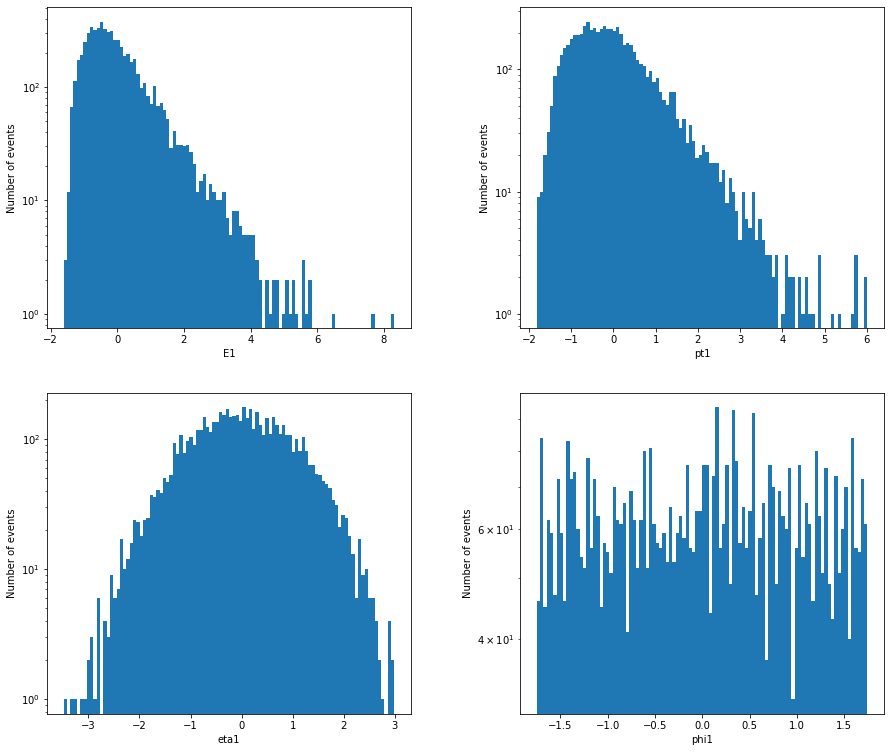

In [15]:
plot_all(std_normalized_data)

As we can see from the graph the variance of input features is much better now.

Lets split and save the std normalized data to pickle format.

In [16]:
split_to_pickle(std_normalized_data, path="./StdNorm")

Train len, Test len - 4341 1861
Training Sample : 
            E1       pt1      eta1      phi1
5337  1.897219  0.567715 -1.648733  0.482799
1994  0.016521 -1.077477  1.827353 -0.566898
1345 -0.291737 -0.349817  0.983807  0.206499
5063  0.821635  1.014189  0.985275 -0.971140
5542  0.832228  1.042104 -0.985204  1.617680
Testing Sample:
            E1       pt1      eta1      phi1
1079 -0.633601 -1.470529 -1.783077 -1.687171
3930  0.888678  1.672273 -0.706491 -0.725739
5437  0.348725 -0.167166  1.342519  0.571174
3492 -0.619405 -0.398526 -0.449922 -0.904088
3702 -0.603715 -0.475699  0.719120 -1.426715


Now lets do some custom normilization with the observations we have.

In [17]:
data_j.describe()

,E1,pt1,eta1,phi1
count,6.202000e+03,6.202000e+03,6202.000000,6202.000000
mean,8.328681e+05,5.894371e+05,0.003228,0.004107
std,4.304731e+05,2.495423e+05,0.882507,1.797267
min,1.398320e+05,1.358400e+05,-3.073250,-3.141360
25%,5.371622e+05,4.118815e+05,-0.615603,-1.538725
50%,7.359280e+05,5.503945e+05,-0.008853,0.042355
75%,1.014190e+06,7.121242e+05,0.625929,1.519430
max,4.413680e+06,2.090860e+06,2.644470,3.139160


As we can see the variance of E1 and pt1 is very high.

To make the variance smaller we can do log normilization on the columns.

For this we just need to take log of all values in the column.

In [18]:
log_normalized_data = data_j.copy()
log_normalized_data['E1'] = np.log10(log_normalized_data['E1'])
log_normalized_data['pt1'] = np.log10(log_normalized_data['pt1'])

Now lets check the statistics of the log normalized data.

In [19]:
log_normalized_data.describe()

,E1,pt1,eta1,phi1
count,6202.000000,6202.000000,6202.000000,6202.000000
mean,5.870722,5.734102,0.003228,0.004107
std,0.206139,0.178318,0.882507,1.797267
min,5.145607,5.133028,-3.073250,-3.141360
25%,5.730105,5.614772,-0.615603,-1.538725
50%,5.866835,5.740674,-0.008853,0.042355
75%,6.006119,5.852556,0.625929,1.519430
max,6.644801,6.320325,2.644470,3.139160


As we can see the variance of E1 and pt1 is much smaller now.

Let's plot the data to take a better look.

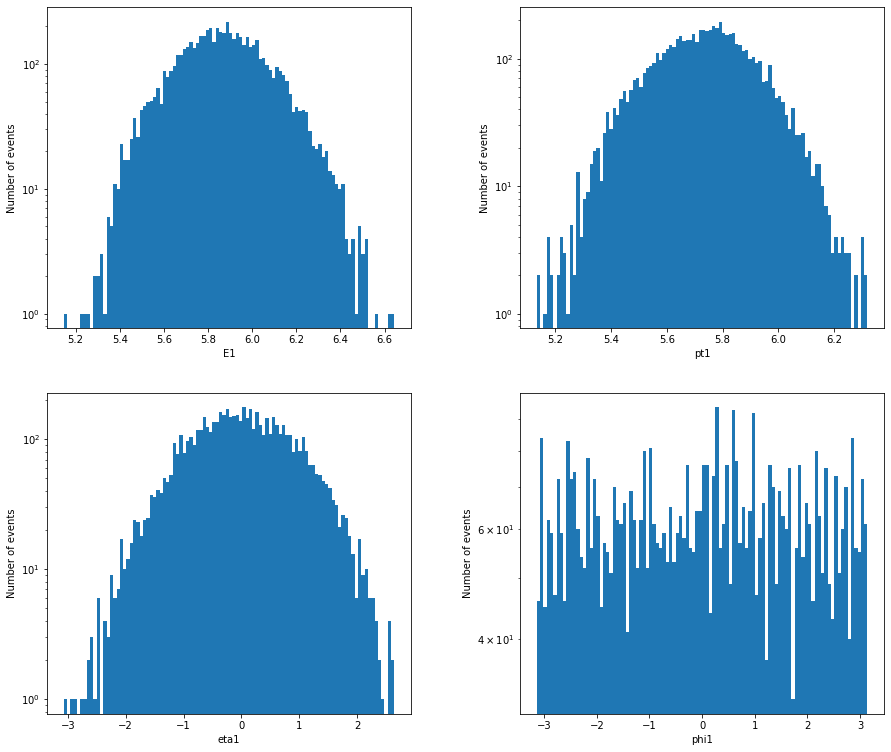

In [20]:
plot_all(log_normalized_data)

Now as we can observe from the graphs the distribution the all the input features is uniform which is represented by the bell like curve when plotting the data.

Now to further improve this, we can see that the peak of the curve of E1 and pt1 is not around zero on the x-axis, this can be a problem.

We can overcome this problem by substracting the mean from E1 and pt1 respectively.

In [21]:
log_normalized_data['E1'] = log_normalized_data['E1'] - 5.870722
log_normalized_data['pt1'] = log_normalized_data['pt1'] - 5.734102

Now lets check the statistics of the log normalized and mean corrected data.

In [22]:
log_normalized_data.describe()

,E1,pt1,eta1,phi1
count,6.202000e+03,6.202000e+03,6202.000000,6202.000000
mean,-4.060624e-07,-2.049346e-07,0.003228,0.004107
std,2.061387e-01,1.783180e-01,0.882507,1.797267
min,-7.251154e-01,-6.010743e-01,-3.073250,-3.141360
25%,-1.406165e-01,-1.193297e-01,-0.615603,-1.538725
50%,-3.886674e-03,6.572075e-03,-0.008853,0.042355
75%,1.353973e-01,1.184538e-01,0.625929,1.519430
max,7.740788e-01,5.862230e-01,2.644470,3.139160


Lets plot the data to have a better look.

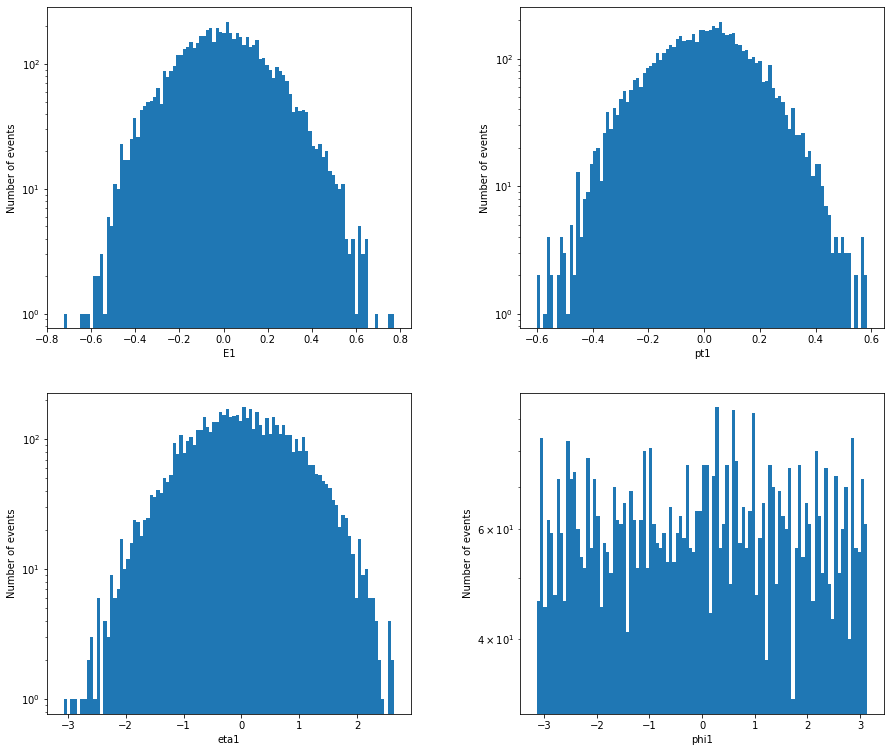

In [23]:
plot_all(log_normalized_data)

Now the imporve this further we can scale these values between -1 and 1 using the min-max values of each input feature.

In [24]:
log_normalized_data['E1'] = log_normalized_data['E1'] / 0.7
log_normalized_data['pt1'] = log_normalized_data['pt1'] / 0.6
log_normalized_data['eta1'] = log_normalized_data['eta1'] / 2.6
log_normalized_data['phi1'] = log_normalized_data['phi1'] / 3.14

Lets plot the data now to take a better look.

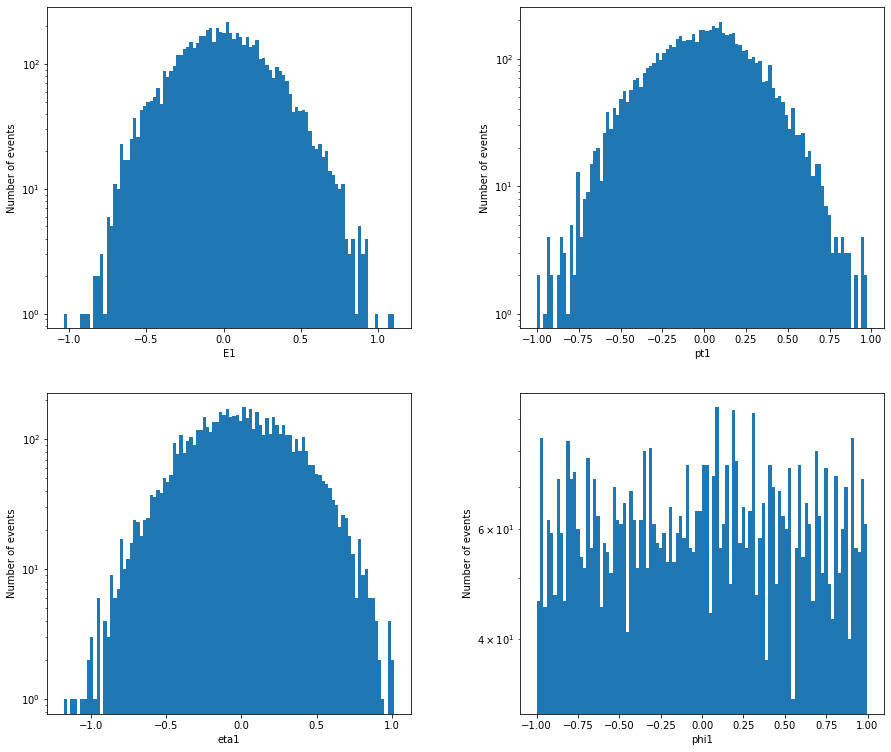

In [25]:
plot_all(log_normalized_data)

As we can see from the graphs all our values are roughly between -1 and 1.

Now we can combine all these transformations in custom_normalize_4D function and custom_unnormalize_4D function.

In [26]:
def custom_normalize_4D(data):
    data_copy = data.copy()
    data_copy['E1'] = (np.log10(data_copy['E1']) - 5.870722) / 0.7
    data_copy['pt1'] = (np.log10(data_copy['pt1']) - 5.734102) / 0.6
    data_copy['eta1'] = data_copy['eta1'] / 2.6
    data_copy['phi1'] = data_copy['phi1'] / 3.14
    return data_copy


def custom_unnormalize_4D(data):
    data_copy = data.copy()
    data_copy['E1'] = np.power(10, data_copy['E1'] * 0.7 + 5.870722)
    data_copy['pt1'] = np.power(10, data_copy['pt1'] * 0.6 + 5.734102)
    data_copy['eta1'] = data_copy['eta1'] * 2.6
    data_copy['phi1'] = data_copy['phi1'] * 3.14
    return data_copy

Lets custom normalize and plot the data.

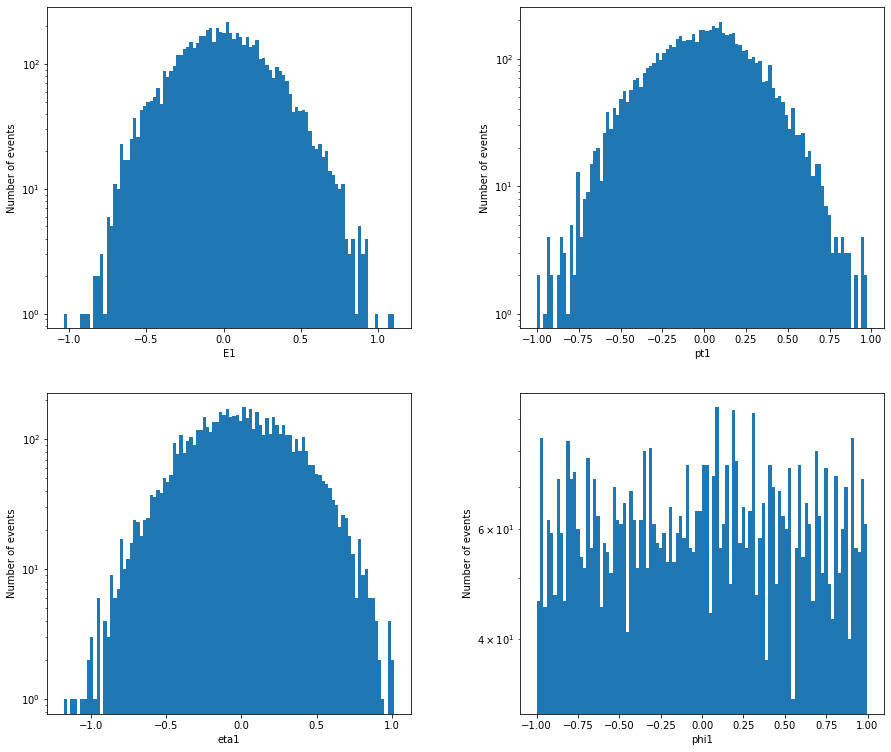

In [27]:
custom_normalized_data = custom_normalize_4D(data_j)
plot_all(custom_normalized_data)

We split and save the custom normalized data.

In [28]:
split_to_pickle(custom_normalized_data, path="./CustomNorm")

Train len, Test len - 4341 1861
Training Sample : 
            E1       pt1      eta1      phi1
5337  0.495212  0.216464 -0.558381  0.277652
1994  0.076496 -0.380319  0.621492 -0.323172
1345 -0.030184 -0.055458  0.335171  0.119504
5063  0.290811  0.319130  0.335669 -0.554551
5542  0.293191  0.325090 -0.333162  0.927232
Testing Sample:
            E1       pt1      eta1      phi1
1079 -0.174916 -0.644692 -0.603981 -0.964392
3930  0.305721  0.448026 -0.238560 -0.414089
5437  0.174036  0.007430  0.456927  0.328236
3492 -0.168183 -0.073194 -0.151473 -0.516172
3702 -0.160827 -0.102217  0.245329 -0.815312
